In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import feature_selection
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [ ]:
path_test = '/content/drive/MyDrive/Datasets/titanic_test.csv'
path_train = '/content/drive/MyDrive/Datasets/titanic_train.csv'
train_data = pd.read_csv(path_train)
test_data = pd.read_csv(path_test)

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# **Data Cleaning**

In [ ]:
trainTest = pd.concat([train_data, test_data], sort=False).reset_index(drop=True)
trainTest.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
trainTest.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [ ]:
trainTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


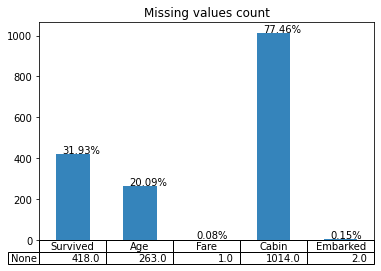

In [ ]:
rows_length = trainTest.shape[0]
fields_with_nan_length = trainTest.isna().sum().where(lambda x : x > 0).dropna()

ax = fields_with_nan_length \
.plot(kind='bar', alpha=0.9, title='Missing values count', table=True)
ax.xaxis.set_visible(False) # hide x axis labels

for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()+5, \
            str(round((i.get_height()/rows_length)*100, 2))+'%')

## Replacing numerical features Null Value with median : Fare and Age


### **FARE**

In [ ]:
trainTest[trainTest['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [ ]:
trainTest['Fare'] = trainTest['Fare'].fillna(trainTest.groupby(['SibSp','Parch','Pclass']).Fare.median()[0][0][3])

In [ ]:
trainTest['Fare'].isnull().sum()

0

### **AGE**

In [ ]:
trainTest[trainTest['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1301,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
trainTest['Title'] = trainTest['Name'].str.split(', ', expand = True)[1].str.split('.', expand = True)[0]
trainTest['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [ ]:
common_title = ['Mr', 'Mrs', 'Master']
trainTest['Title'].replace(['Mlle','Ms','Mme', 'Miss', 'Lady', 'Dona', 'the Countess'],'Mrs', inplace=True)
trainTest['Title'].replace(['Sir', 'Rev', 'Capt', 'Don', 'Major', 'Col', 'Dr', 'Jonkheer'],'Mr', inplace=True)
# Check the Title we have
trainTest['Title'].value_counts()

Mr        783
Mrs       465
Master     61
Name: Title, dtype: int64

In [ ]:
age_median_by_Title = trainTest.groupby('Title')['Age'].median()
for title in age_median_by_Title.index:
    trainTest['Age'][(trainTest.Age.isnull()) & (trainTest.Title == title)] = age_median_by_Title[title]

<ipython-input-302-053f639ea998>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainTest['Age'][(trainTest.Age.isnull()) & (trainTest.Title == title)] = age_median_by_Title[title]


In [ ]:
trainTest['Age'].isnull().sum()

0

## Replacing categorical features Null Value with mode : Embarked


In [ ]:
trainTest[trainTest['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Mrs
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


In [ ]:
trainTest['Embarked'].fillna(trainTest['Embarked'].mode()[0], inplace = True)

In [ ]:
trainTest['Embarked'].isnull().sum()

0

## Dropping 'Cabin' value due to high number of missing values


In [ ]:
trainTest.drop(['Cabin'], axis=1, inplace=True)

# **EDA - Exploratory Data Analysis**

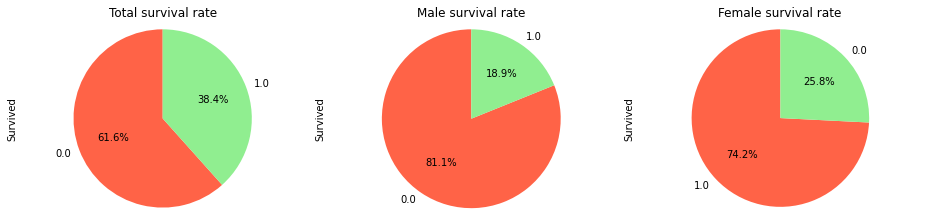

In [ ]:
# Specifies the parameters of our graphs
plt.figure(figsize=(13,6))
plot_params = {
    'kind': 'pie',
    'startangle': 90,
    'autopct': '%1.1f%%',
    'colors': ['tomato', 'lightgreen']
}


# Plots a bar graph of those who surived vs those who did not
plt.subplot2grid((2,3), (0,0))
trainTest.Survived.value_counts() \
.plot(title='Total survival rate', **plot_params).axis('equal')


# Survival rate wrt Sex
df_male = trainTest.Survived[trainTest.Sex == 'male'].value_counts(normalize=True, sort=False)
df_female = trainTest.Survived[trainTest.Sex == 'female'].value_counts(normalize=True, sort=False)

## male survival plot
plt.subplot2grid((2,3),(0,1))
df_male.plot(title='Male survival rate', **plot_params).axis('equal')

## female survival plot
plt.subplot2grid((2,3),(0,2))
df_female.plot(title='Female survival rate', **plot_params).axis('equal')



plt.tight_layout()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


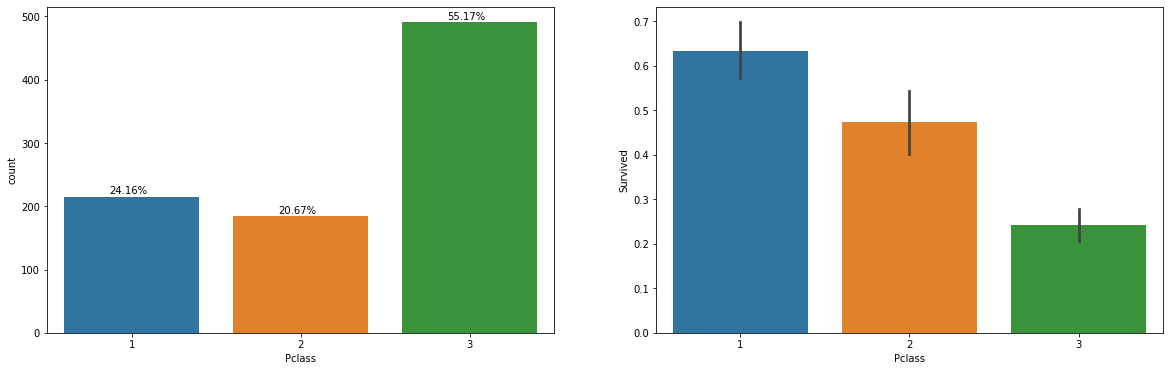

In [ ]:
f, ax = plt.subplots(ncols=2,figsize=(20,6))
sns.barplot(x=train_data['Pclass'], y=train_data['Survived'], ax=ax[1])
sns.countplot(train_data['Pclass'], ax=ax[0])
    
tot = float(len(train_data['Pclass']))
for p in ax[0].patches:
  ht = p.get_height()
  ax[0].text(p.get_x() + p.get_width() / 3., ht + 5, '{:1.2f}%'.format((ht / tot) * 100))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


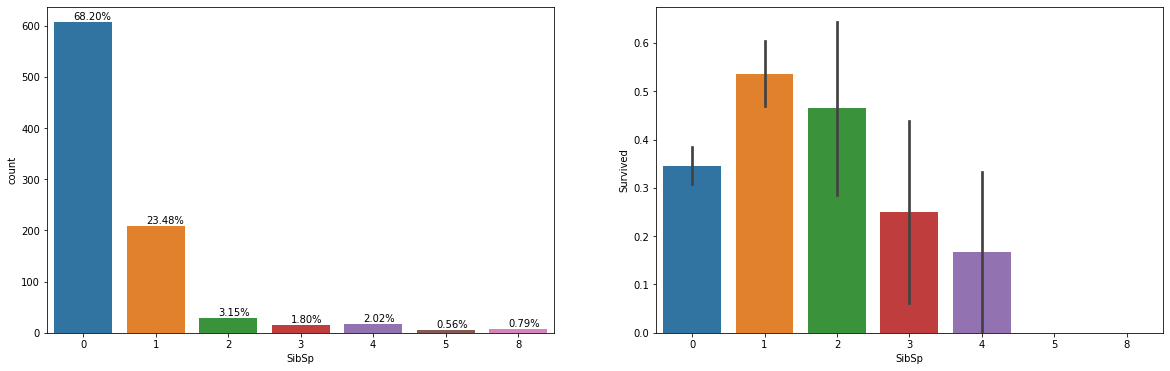

In [ ]:
f, ax = plt.subplots(ncols=2,figsize=(20,6))
sns.barplot(x=train_data['SibSp'], y=train_data['Survived'], ax=ax[1])
sns.countplot(train_data['SibSp'], ax=ax[0])
    
tot = float(len(train_data['SibSp']))
for p in ax[0].patches:
  ht = p.get_height()
  ax[0].text(p.get_x() + p.get_width() / 3., ht + 5, '{:1.2f}%'.format((ht / tot) * 100))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


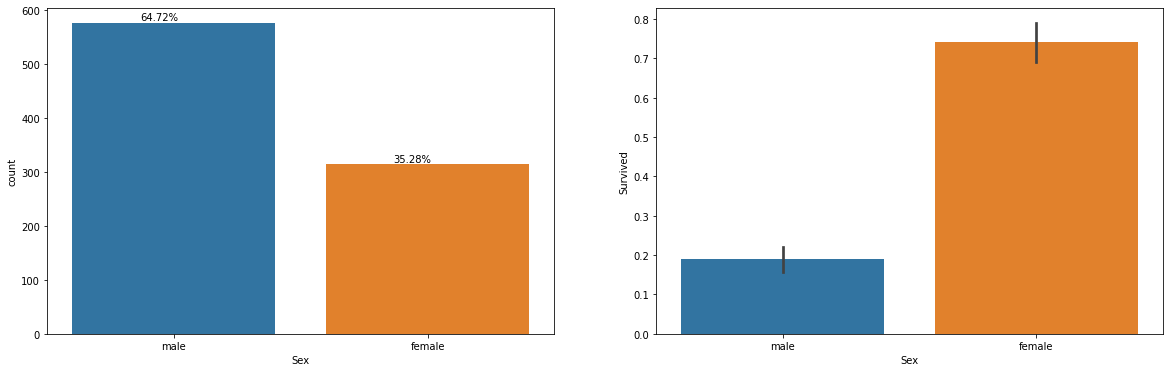

In [ ]:
f, ax = plt.subplots(ncols=2,figsize=(20,6))
sns.barplot(x=train_data['Sex'], y=train_data['Survived'], ax=ax[1])
sns.countplot(train_data['Sex'], ax=ax[0])
    
tot = float(len(train_data['Sex']))
for p in ax[0].patches:
  ht = p.get_height()
  ax[0].text(p.get_x() + p.get_width() / 3., ht + 5, '{:1.2f}%'.format((ht / tot) * 100))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


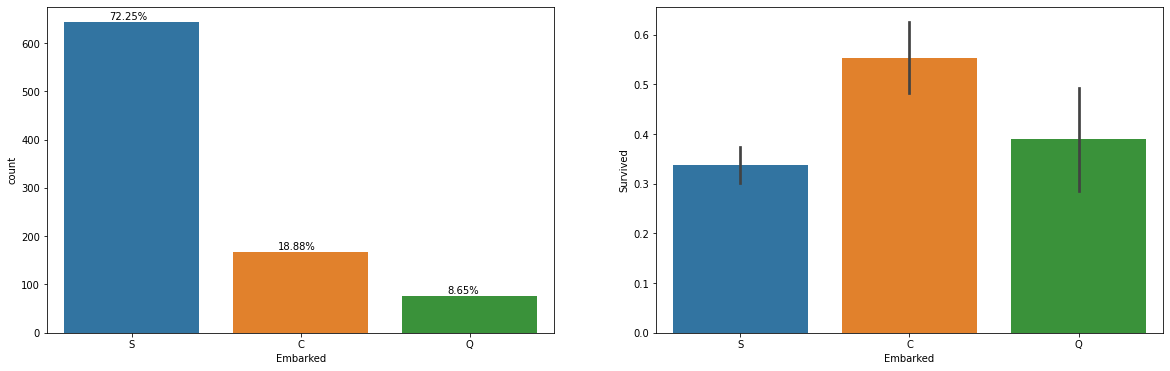

In [ ]:
f, ax = plt.subplots(ncols=2,figsize=(20,6))
sns.barplot(x=train_data['Embarked'], y=train_data['Survived'], ax=ax[1])
sns.countplot(train_data['Embarked'], ax=ax[0])
    
tot = float(len(train_data['Embarked']))
for p in ax[0].patches:
  ht = p.get_height()
  ax[0].text(p.get_x() + p.get_width() / 3., ht + 5, '{:1.2f}%'.format((ht / tot) * 100))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


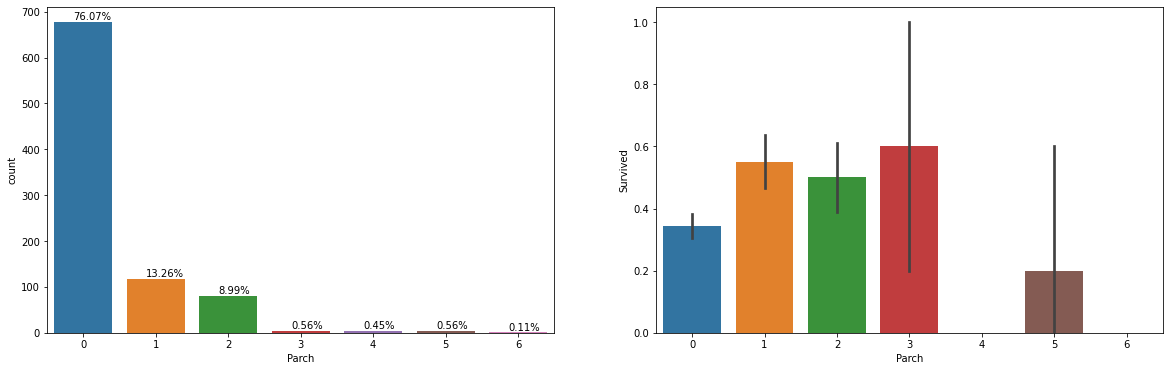

In [ ]:
f, ax = plt.subplots(ncols=2,figsize=(20,6))
sns.barplot(x=train_data['Parch'], y=train_data['Survived'], ax=ax[1])
sns.countplot(train_data['Parch'], ax=ax[0])
    
tot = float(len(train_data['Parch']))
for p in ax[0].patches:
  ht = p.get_height()
  ax[0].text(p.get_x() + p.get_width() / 3., ht + 5, '{:1.2f}%'.format((ht / tot) * 100))

In [ ]:
trainTest['Pclass'] = pd.to_numeric(trainTest['Pclass'])

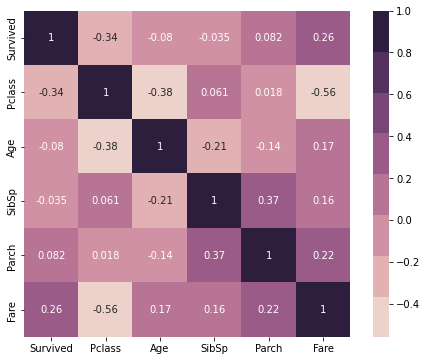

In [ ]:
fig = plt.figure(figsize=(8,6))

sns.heatmap(trainTest.corr(method='pearson'), square=True, annot=True, cmap=sns.cubehelix_palette(8))

# **Modelling**

In [ ]:
train_data.drop(train_data[(train_data['Name'] == 'Partner, Mr. Austen')].index, inplace=True)
train_data['Name']=='Partner, Mr. Austen'.index

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Name, Length: 890, dtype: bool

In [ ]:
X = train_data.drop("Survived", axis=1)
y = train_data["Survived"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

## Logisitc Regression

In [ ]:
regr = LogisticRegression()

In [ ]:
regr.fit(X_train, y_train)

In [ ]:
regr.score(X_train, y_train)

In [ ]:
regr.score(X_test, y_test)

## Support Vector Classifier (SVC)

In [ ]:
svc = SVC(probability=True)

In [ ]:
svc.fit(X_train, y_train)

In [ ]:
svc.score(X_train, y_train)

In [ ]:
svc.score(X_test, y_test)

## Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train, y_train)

In [ ]:
dt.score(X_train, y_train)

In [ ]:
dt.score(X_test, y_test)

## Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
rf.score(X_train, y_train)

In [ ]:
rf.score(X_test, y_test)